Load the MNIST data.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

Using TensorFlow backend.


Show a sample image

In [2]:
from matplotlib import pyplot as plt

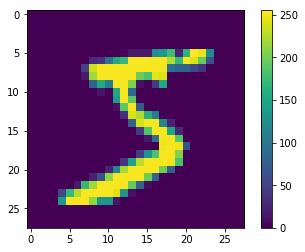

In [3]:
plt.imshow(train_images[0,:,:])
plt.colorbar()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
val_images = val_images.reshape((10000, 28, 28, 1))
val_images = val_images.astype("float32") / 255
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [5]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [9]:
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
hist_MNIST = model.fit(train_images, train_labels, epochs=5, batch_size=64,
    validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 756us/step - loss: 0.1683 - acc: 0.9485 - val_loss: 0.0569 - val_acc: 0.9818
Epoch 2/5
60000/60000 [==============================] - 41s 680us/step - loss: 0.0495 - acc: 0.9845 - val_loss: 0.0453 - val_acc: 0.9855
Epoch 3/5
60000/60000 [==============================] - 42s 708us/step - loss: 0.0343 - acc: 0.9893 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 44s 738us/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0308 - val_acc: 0.9903
Epoch 5/5
60000/60000 [==============================] - 43s 722us/step - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0279 - val_acc: 0.9918


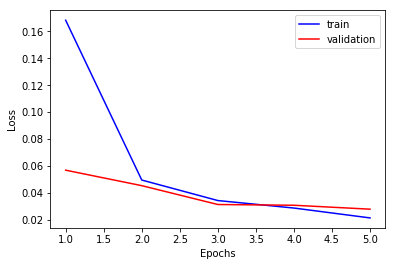

In [10]:
history_dict = hist_MNIST.history
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, "b-", label="train")
plt.plot(epochs, val_loss, "r-", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("MNIST_loss.pdf")
plt.show()

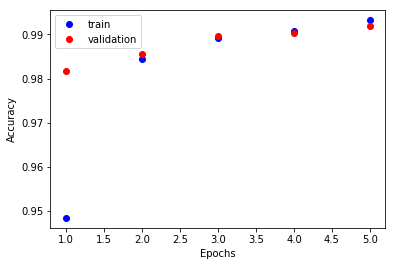

In [11]:
train_acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, train_acc, "bo", label="train")
plt.plot(epochs, val_acc, "ro", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("MNIST_accuracy.pdf")
plt.show()